WNIXALO|| fastai `download_images` debugging| | 20181027
-|-|-

---

version: fastai developer install, updated: 20181027

## setup & replication:

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
# this doesn't become available from the * import
from fastai.vision.data import download_image
from concurrent.futures import as_completed

In [3]:
folder = 'f22'
file   = 'urls_f22.txt'
path   = Path('data/aircraft/')
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
urls = ['https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
        'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/f-22_2.jpg.pc-adaptive.full.medium.jpeg',
        'https://upload.wikimedia.org/wikipedia/commons/4/46/Lockheed_Martin_F-22A_Raptor_JSOH.jpg',
        'https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/f22raptorthatcouldtotallybeatupanf35.jpg?itok=JNOaTwUt',
        'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/F-22-Squadron.png',
        'https://amp.businessinsider.com/images/5b5f59472ee9d31d008b4928-750-500.jpg',
        'https://hips.hearstapps.com/pop.h-cdn.co/assets/17/32/1600x800/landscape-1502315162-badass-plane-f-22.jpg?resize=480:*',
        'http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85',
        'https://media.defense.gov/2011/Aug/11/2000229721/780/780/0/110811-F-BS330-001.JPG',
        'https://theaviationist.com/wp-content/uploads/2015/09/F-22-Code-One-2.jpg']

In [5]:
with open(path/'urls_f22.txt', 'w') as f:
    for url in urls:
        f.write(url + '\n')

In [6]:
for fl in dest.iterdir():
    os.remove(fl)

## debugging

### run 1

In [8]:
# edit src to print f
download_images(path/file, dest, max_pics=10)

<Future at 0x1a2bbe25c0 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe23c8 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe27b8 state=finished raised BrokenProcessPool>
<Future at 0x1a2bc597b8 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2710 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2320 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2518 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2470 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2668 state=finished raised BrokenProcessPool>
<Future at 0x1a2bbe2860 state=finished raised BrokenProcessPool>


### run 2

In [10]:
def download_images_2(urls:Collection[str], dest:PathOrStr, max_pics:int=1000):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    urls = open(urls).read().strip().split("\n")[:max_pics]
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    try: download_url(urls[0], dest, overwrite=True)
    except IsADirectoryError: pass
    with ProcessPoolExecutor(max_workers=8) as ex:
        futures = [ex.submit(download_image, url, dest/f"{i:08d}.jpg")
                   for i,url in enumerate(urls)]
        for f in progress_bar(as_completed(futures), total=len(urls)): print(f)

In [12]:
download_images_2(path/file, dest, max_pics=10)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'
<Future at 0x1a2bb49588 state=finished returned NoneType>
<Future at 0x1a2bb49160 state=finished returned NoneType>
<Future at 0x1a2bbe2668 state=finished returned NoneType>
<Future at 0x1a2bb49438 state=finished returned NoneType>
<Future at 0x1a2bb494e0 state=finished returned NoneType>
<Future at 0x1a2bb49630 state=finished returned NoneType>
<Future at 0x1a2bc59048 state=finished returned NoneType>
<Future at 0x1a2bb496d8 state=finished returned NoneType>
<Future at 0x1a2bb49240 state=finished returned NoneType>
<Future at 0x1a2bb49390 state=finished returned NoneType>


### run 3

In [8]:
urls = path/file
dest = dest
max_pics=10

In [9]:
urls = open(urls).read().strip().split("\n")[:max_pics]
dest = Path(dest)
dest.mkdir(exist_ok=True)

In [10]:
with ProcessPoolExecutor(max_workers=8) as ex:
    futures = [ex.submit(download_image, url, dest/f"{i:08d}.jpg")
               for i,url in enumerate(urls)]
    for f in progress_bar(as_completed(futures), total=len(urls)): print(f)

<Future at 0x1a26d489e8 state=finished raised BrokenProcessPool>
<Future at 0x1a26d487b8 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48f60 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48d68 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48940 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48cc0 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48eb8 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48860 state=finished raised BrokenProcessPool>
<Future at 0x1a26d48e10 state=finished raised BrokenProcessPool>
<Future at 0x1a26d3fc18 state=finished raised BrokenProcessPool>


In [11]:
ex = ProcessPoolExecutor(max_workers=8)

In [12]:
futures = [ex.submit(download_image, url, dest/f"{i:08d}.jpg")
           for i,url in enumerate(urls)]

In [13]:
futures

[<Future at 0x1a26d27da0 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48358 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48f28 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48518 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48278 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48b00 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d483c8 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48208 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48fd0 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d48908 state=finished raised BrokenProcessPool>]

In [ ]:
ex.submit()

In [17]:
ex = ProcessPoolExecutor(max_workers=8)
futures = [ex.submit(download_image, url, (str(dest)+'/'+f"{i:08d}.jpg"))
           for i,url in enumerate(urls)]

In [18]:
futures

[<Future at 0x1a26d7bb38 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7b668 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7f4a8 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7f438 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7f278 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7f160 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d7f358 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d279b0 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d81048 state=finished raised BrokenProcessPool>,
 <Future at 0x1a26d810f0 state=finished raised BrokenProcessPool>]

In [19]:
download_image

<function fastai.vision.data.download_image(url, dest)>

In [22]:
url_fname = [(url, dest/f"{i:08d}.jpg") for i,url in enumerate(urls)][0]
url_fname

('https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
 PosixPath('data/aircraft/f22/00000000.jpg'))

In [24]:
download_image(url_fname[0], url_fname[1])

In [26]:
ex = ProcessPoolExecutor(max_workers=8)
futures = [ex.submit(download_image, url, (str(dest)+'/'+f"{i:08d}.jpg"))
           for i,url in enumerate(urls)]

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


### Implementing quick fix:

In [7]:
download_images(path/file, dest, max_pics=10)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


In [25]:
list((path/folder).iterdir())

[PosixPath('data/aircraft/f22/00000000.jpg')]

In [11]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

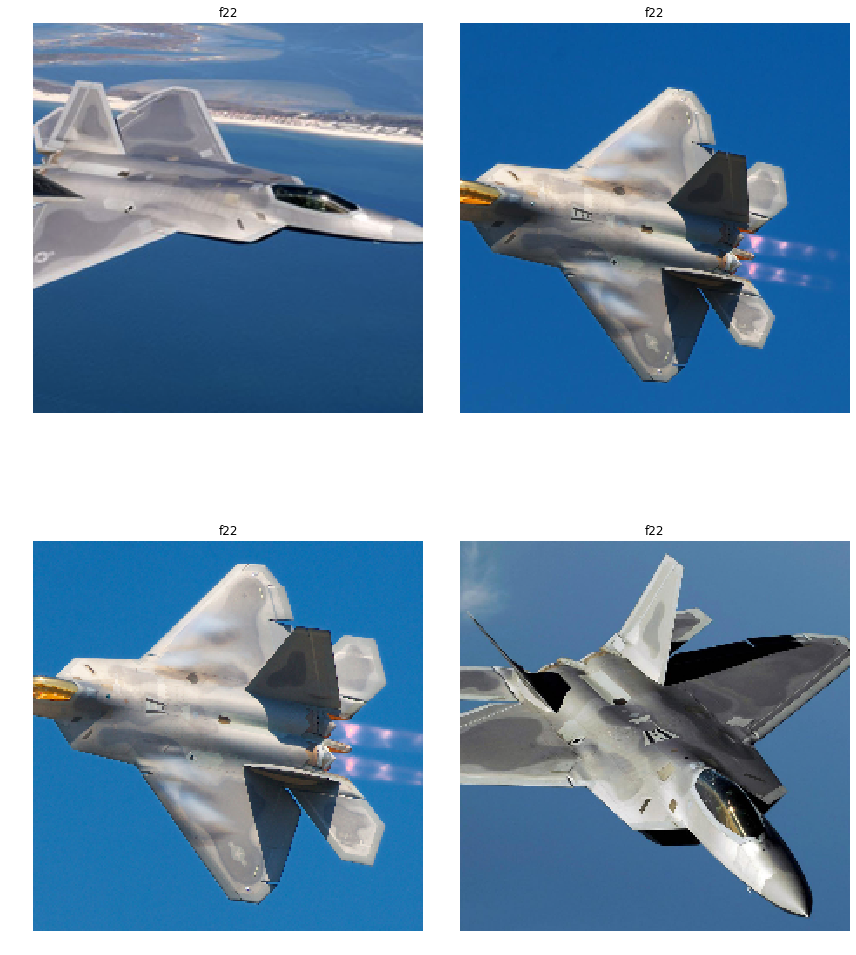

In [12]:
data.show_batch()